제품 200개의 Lot별 불량 제품 수량 데이터에 대해 p관리도를 구하고 시각화하시오.

1. p관리도에 따라 관리 중심선, 관리 상한선, 하한선을 구하시오.
- n : lot별 생산수량
- p : lot별 불량 수량
- CL : 전체불량수량/전체 생산수량

In [4]:
import pandas as pd
df = pd.read_csv('../data/lot_quality.csv',index_col='lot')
df

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15
...,...,...
196,631,18
197,565,21
198,570,12


In [5]:
df['p'] = df['불량수량']/df['생산수량']
df['UCL'] = df['p'] + (3*(df['p'] * (1-df['p']) / df['생산수량']) ** 0.5)
df['LCL'] = df['p'] - (3*(df['p'] * (1-df['p']) / df['생산수량']) ** 0.5)

# 관리 중심선
CL = df['불량수량'].sum() / df['생산수량'].sum()
print('관리중심선 : ',CL)
df

관리중심선 :  0.029024320840935338


,생산수량,불량수량,p,UCL,LCL
lot,,,,,
1,587,19,0.032368,0.054282,0.010454
2,588,15,0.025510,0.045017,0.006004
3,455,19,0.041758,0.069892,0.013625
4,666,12,0.018018,0.033481,0.002555
5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...
196,631,18,0.028526,0.048407,0.008645
197,565,21,0.037168,0.061044,0.013292
198,570,12,0.021053,0.039092,0.003013


2. 관리도를 시각화하시오.

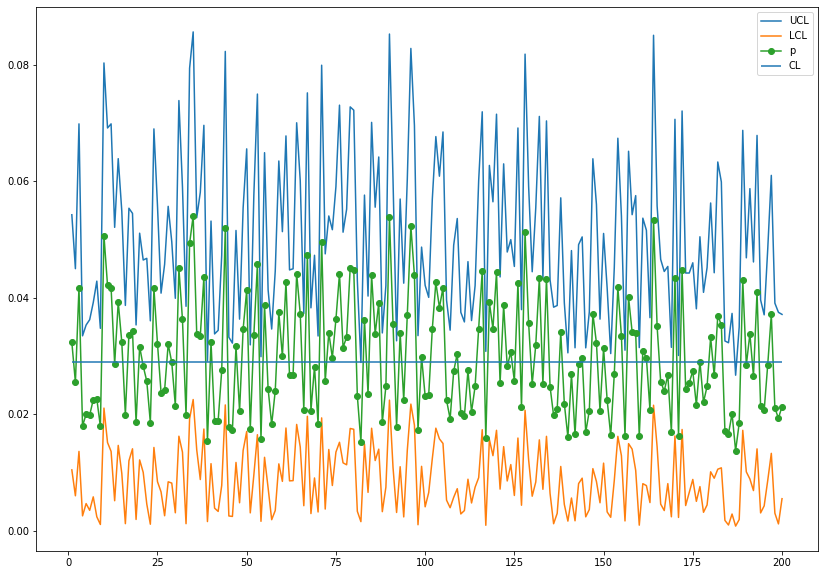

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.plot(df['UCL'])
plt.plot(df['LCL'])
plt.plot(df['p'], marker='o')

plt.hlines(CL, 1,200)
plt.legend(['UCL', 'LCL', 'p', 'CL'])